# K-armed bandit as a first implementation of Reinforcement Learning

## Author: Peter Martigny, 2017

The goal of this tutorial is to walk through a first implementation of a RL agent: the K-armed bandit.
The code provided here is based on Chapter 2 the book of Sutton & Barto Reinforcement Learning: An Introduction, available freely online at: 
http://incompleteideas.net/sutton/book/bookdraft2017june.pdf

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
%matplotlib inline

In [121]:
# Number of arms
K = 50
# Number of trials
n_step = 300
# Probability of exploration
# Very important terms exploration/exploitation tradeoff
epsilon = 0.1
# Q function (table)
Q = np.zeros(K)
# Number of times we took this arm
N = np.zeros(K)
# Distribution of rewards for different arms
bandit = np.random.random(K)
# Initialize action to zero
A = 0
# Keep memory of the distance of the Q table to the bandit table to monitor convergence
norms = []

for i in range(n_step):
    
    # Epsilon greedy search to take action
    greed = np.random.random()
    
    if greed > epsilon:
        A = np.argmax(Q)   
    else:
        A = np.random.randint(K)
        
    # The enviroment gives a reward for takoing action A  
    R = bandit[A] # Reward from bandit
    
    # We upate N and Q
    N[A] += 1
    Q[A] += (1/N[A]) * (R - Q[A])
    
    norms.append(norm(Q - bandit))

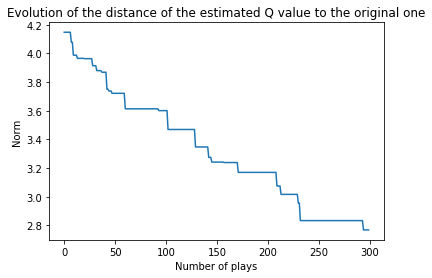

In [122]:
plt.plot(norms)
plt.title('Evolution of the distance of the estimated Q value to the original one')
plt.xlabel('Number of plays')
plt.ylabel('Norm')
plt.show()

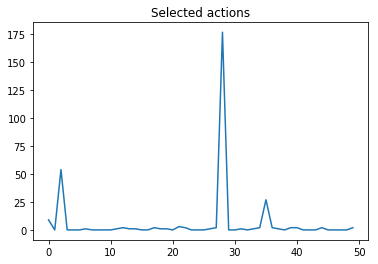

In [125]:
plt.title("Selected actions")
plt.plot(N)
plt.show()